In [3]:
!pip install pandas

  Using cached pandas-2.1.3-cp310-cp310-macosx_11_0_arm64.whl (10.9 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import os
import pickle
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from genetic import fitness

In [5]:
def is_valid(g, s):
    return all(sum(s[v_int] for v in g[n] if (v_int := int(v))) >= 2
               for n in g
               if (n_int := int(n)) and not s[n_int])


### Experimento 1

In [6]:
results = "../results"

data = defaultdict(dict)

for filename in os.listdir(results):
    if filename.endswith('.graphml'):
        file_path = os.path.join(results, filename)
        G = nx.read_graphml(file_path)
        index = int(filename.split('.')[0])
        data[index]['g'] = G
    if filename.endswith('.pkl'):
        file_path = os.path.join(results, filename)
        with open(file_path, 'rb') as file:
            r = pickle.load(file)
            index = int(filename.split('.')[0])
            data[index].update(r)

In [7]:
data = pd.DataFrame(data).T
data.sort_index(inplace=True)
data.dropna(inplace=True)
data

,alg,alg_t,gen,gen_t,g
2,"{0, 1}",0.000652,"{0, 1}",5.858148,"(0, 1)"
3,"{0, 1, 2}",0.00006,"{0, 1}",4.635681,"(0, 1, 2)"
4,"{1, 2, 3}",0.000066,"{1, 2, 3}",4.727917,"(0, 1, 2, 3)"
5,"{0, 1, 2, 3}",0.000075,"{1, 2, 3}",4.879394,"(0, 1, 2, 3, 4)"
6,"{0, 2, 4, 5}",0.000077,"{0, 2, 4, 5}",4.999606,"(0, 1, 2, 3, 4, 5)"
...,...,...,...,...,...
512,"{0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15...",0.023608,"{0, 1, 2, 3, 7, 8, 10, 11, 14, 16, 17, 18, 19,...",67.1913,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1024,"{1, 2, 3, 5, 7, 9, 11, 12, 14, 15, 17, 18, 19,...",0.158834,"{1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 14, 16, 23, ...",130.609058,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2048,"{0, 3, 4, 5, 7, 9, 10, 11, 13, 15, 17, 18, 20,...",0.69962,"{2, 3, 4, 8, 9, 11, 16, 20, 21, 22, 24, 27, 28...",257.311862,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4096,"{0, 1, 3, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...",1.378018,"{2, 3, 6, 8, 10, 11, 13, 14, 17, 21, 23, 24, 2...",505.157297,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [8]:
def a_is_valid(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return is_valid(d['g'], s_list)

def a_fitness(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return fitness(d['g'], s_list)

In [9]:
data['alg_f'] = data.apply(a_fitness, axis=1, args=('alg', ))
data['gen_f'] = data.apply(a_fitness, axis=1, args=('gen', ))
data['gen_v'] = data.apply(a_is_valid, axis=1, args=('gen', ))
data

valid_non_s=0 leafs_on_s=1
valid_non_s=0 leafs_on_s=1
valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=3
valid_non_s=2 leafs_on_s=2
valid_non_s=0 leafs_on_s=4
valid_non_s=0 leafs_on_s=5
valid_non_s=1 leafs_on_s=4
valid_non_s=1 leafs_on_s=6
valid_non_s=3 leafs_on_s=4
valid_non_s=0 leafs_on_s=10
valid_non_s=0 leafs_on_s=8
valid_non_s=4 leafs_on_s=5
valid_non_s=3 leafs_on_s=6
valid_non_s=3 leafs_on_s=8
valid_non_s=3 leafs_on_s=9
valid_non_s=3 leafs_on_s=11
valid_non_s=7 leafs_on_s=7
valid_non_s=6 leafs_on_s=8
valid_non_s=3 leafs_on_s=9
valid_non_s=8 leafs_on_s=8
valid_non_s=5 leafs_on_s=11
valid_non_s=7 leafs_on_s=12
valid_non_s=7 leafs_on_s=12
valid_non_s=6 leafs_on_s=10
valid_non_s=5 leafs_on_s=14
valid_non_s=7 leafs_on_s=15
valid_non_s=7 leafs_on_s=12
valid_non_s=7 leafs_on_s=14
valid_non_s=8 leafs_on_s=15
valid_non_s=7 leafs_on_s=16
valid_non_s=11 leafs_on_s=12
valid_non_s=10 leafs_on_s=14
valid_non_s=11 leafs_on_s=15
valid_non_s=7 leafs_on_s=18
valid_non_s=9 leafs_on_s=21
valid_no

,alg,alg_t,gen,gen_t,g,alg_f,gen_f,gen_v
2,"{0, 1}",0.000652,"{0, 1}",5.858148,"(0, 1)",1,1,True
3,"{0, 1, 2}",0.00006,"{0, 1}",4.635681,"(0, 1, 2)",1,1,False
4,"{1, 2, 3}",0.000066,"{1, 2, 3}",4.727917,"(0, 1, 2, 3)",2,2,True
5,"{0, 1, 2, 3}",0.000075,"{1, 2, 3}",4.879394,"(0, 1, 2, 3, 4)",4,4,True
6,"{0, 2, 4, 5}",0.000077,"{0, 2, 4, 5}",4.999606,"(0, 1, 2, 3, 4, 5)",4,4,True
...,...,...,...,...,...,...,...,...
512,"{0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15...",0.023608,"{0, 1, 2, 3, 7, 8, 10, 11, 14, 16, 17, 18, 19,...",67.1913,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",334,211,False
1024,"{1, 2, 3, 5, 7, 9, 11, 12, 14, 15, 17, 18, 19,...",0.158834,"{1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 14, 16, 23, ...",130.609058,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",789,401,False
2048,"{0, 3, 4, 5, 7, 9, 10, 11, 13, 15, 17, 18, 20,...",0.69962,"{2, 3, 4, 8, 9, 11, 16, 20, 21, 22, 24, 27, 28...",257.311862,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1560,739,False
4096,"{0, 1, 3, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...",1.378018,"{2, 3, 6, 8, 10, 11, 13, 14, 17, 21, 23, 24, 2...",505.157297,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2660,1469,False


In [10]:
dt = data.iloc[10]
s = dt.alg
s_list = [n in s for n in dt.g]
fitness(dt.g, s_list)

valid_non_s=0 leafs_on_s=0


0

In [11]:
s_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

<Axes: >

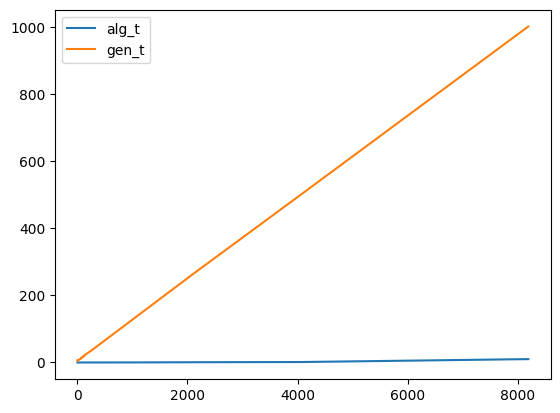

In [12]:
data[["alg_t", "gen_t"]].plot()

<Axes: >

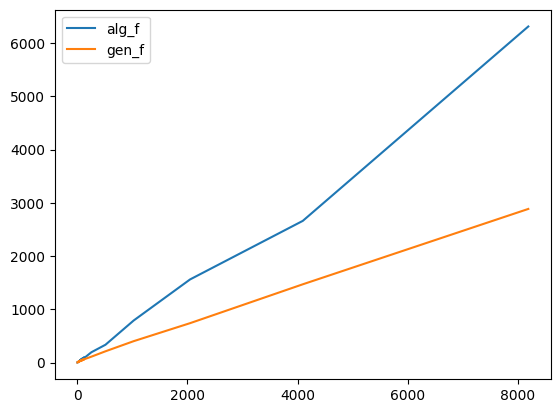

In [14]:
data[["alg_f", "gen_f"]].plot()

In [15]:
data.to_csv("a1")